In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# Problem 1 (Verify that 1729 is the smallest number expressible as the sum of two cubes in two different ways)
def verify_taxicab_2(limit): # limit is the maximum value for a and b
    triples = []
    for a in range(1, limit+1): # first loop for a (from 1 to limit)
        for b in range(a, limit+1): # second loop for b, a ≤ b avoids duplicates
            triples.append((a**3 + b**3, a, b)) # store tuple (sum of cubes, a, b)
    
    triples.sort() # sort by the sum of cubes (the first element in each tuple)                  
    
    for i in range(len(triples)-1):
        if triples[i][0] == triples[i+1][0]: # first repeated sum is the smallest
            n = triples[i][0]
            pairs = [(triples[i][1], triples[i][2]), # first pair (a, b) (1st and 2nd elements of tuple)
                     (triples[i+1][1], triples[i+1][2])] # second pair (a, b) (1st and 2nd elements of tuple)
            return n, pairs

n, pairs = verify_taxicab_2(12) # limit = 12 since 13^3 = 2197 > 1729 (assign output to variables because function returns two values)
print(f"Taxicab(2): {n}")
print(f"Pairs: {pairs}")

Taxicab(2): 1729
Pairs: [(1, 12), (9, 10)]


In [ ]:
# Problem 2.1 (Collatz sequence function)
def collatz_seq(a_0):
    collatz_list = [a_0]
    a_n = a_0
    while a_n != 1: # while loop continues until condition is false (i.e. a_n == 1)
        if a_n % 2 == 0:
            a_n = a_n // 2 # use integer division to keep a_n as an integer
        else:
            a_n = 3 * a_n + 1
        collatz_list.append(a_n)
    return collatz_list
print(collatz_seq(15)) # test example

int_arr = np.arange(1, 1730)
for i in int_arr:
    if collatz_seq(i)[-1] != 1:
        break
else:
    print("All sequences with a_0 <= 1729 end in 1")


[15, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]
All sequences with a_0 <= 1729 end in 1


In [ ]:
#2.2 (Length of the largest collatz sequence for a_0 <= 1729)
len_list = [] 
for i in int_arr:
    len_list.append(len(collatz_seq(i)))

print(f"The length of the largest collatz sequence for a_0 <= 1729 is {max(len_list)} ")

The length of the largest collatz sequence for a_0 <= 1729 is 182 


Text(0.5, 1.0, 'Length of Collatz Sequence vs Starting Integer (a_0)')

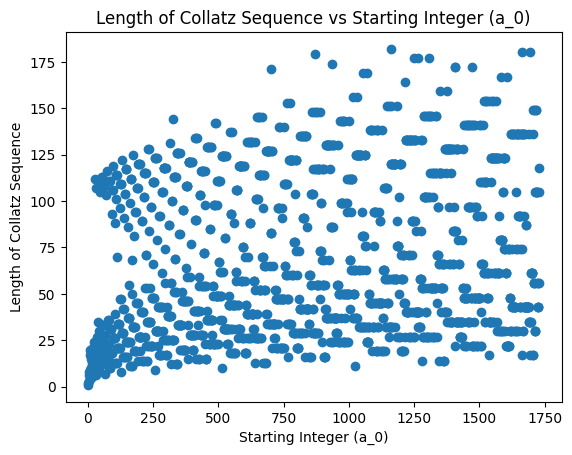

In [ ]:
#2.3 (Plot length of collatz sequence vs starting integer a_0)
plt.scatter(int_arr, len_list) # scatter plot of starting integer vs length of collatz sequence (lists can be used directly)
plt.xlabel('Starting Integer (a_0)')
plt.ylabel('Length of Collatz Sequence')
plt.title('Length of Collatz Sequence vs Starting Integer (a_0)')

In [ ]:
# Problem 3.1 (Trial Division algorithm to find all primes up to N)
def primes_trial_div(N):
    primes = [] 
    for i in range(2, N+1): 
        for j in range(2, i): 
            if i % j == 0: 
                break 
        else: 
            primes.append(i)
    return np.array(primes) 
print(primes_trial_div(30))

[ 2  3  5  7 11 13 17 19 23 29]


In [ ]:
#3.2 (trial division timing using time module)
Ns = np.array([2**k for k in range(10,14)]) 
time_list = []
for N in Ns:
    start_time = time.perf_counter() 
    primes_trial_div(N)
    end_time = time.perf_counter() 
    time_list.append(end_time - start_time) 
print(f'Trial division timing results: {time_list}')   

Trial division timing results: [0.0028492920100688934, 0.010327333002351224, 0.030705291079357266, 0.08956875000149012]


Text(0.5, 1.0, 'Time for Trial Division vs Number of Samples')

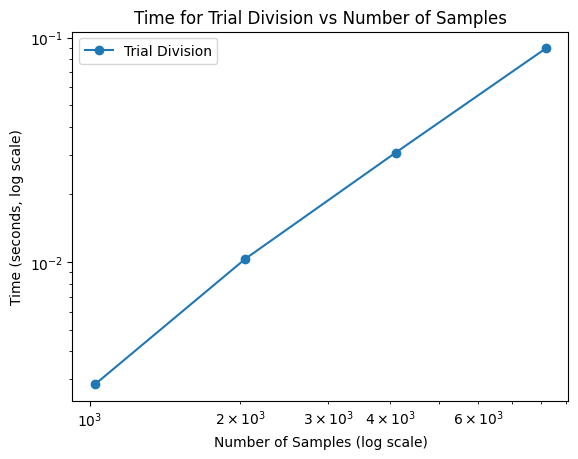

In [ ]:
#3.3 (Plot timing results on log-log scale)
plt.loglog(Ns, time_list, '-o', label = 'Trial Division') 
plt.legend()
plt.xlabel('Number of Samples (log scale)')  
plt.ylabel('Time (seconds, log scale)')
plt.title('Time for Trial Division vs Number of Samples') 

In [ ]:
#3.4 (Estimate power law exponent for Trial Division)
log_Ns = np.log(Ns) 
log_times = np.log(time_list) 

coeffs = np.polyfit(log_Ns, log_times, 1) 
print(f'The power law exponent for Trial Division is ~ {coeffs[0]}') 

The power law exponent for Trial Division is ~ 1.6494979798119966
